In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(1235)

In [3]:
data = [6.,5.,6.5,5.0,4,5,5,5,7.0,5.5,4.5,6.0,5.0,6.0,6.0,5.0,4.5]
data1 = [7.,8.,8.5,7.4,8.9,6.7,9.0,8.4,7.8,5.3,8.1]

In [4]:
print(np.mean(data), np.mean(data1), len(data+data1))

5.352941176470588 7.736363636363635 28


In [5]:
def Boot(sample):
    resample = random.choices(sample, k=len(sample))
    mean = np.mean(resample)
    return mean

In [6]:
meanlist = []
meanlist2 = []

Ntrials = 1000

for i in range(Ntrials):
    x = Boot(data)
    y = Boot(data1)
    meanlist.append(x)
    meanlist2.append(y)

(array([  1.,   7.,  22.,  65., 162., 231., 261., 177.,  61.,  13.]),
 array([6.52727273, 6.73181818, 6.93636364, 7.14090909, 7.34545455,
        7.55      , 7.75454545, 7.95909091, 8.16363636, 8.36818182,
        8.57272727]),
 <a list of 10 Patch objects>)

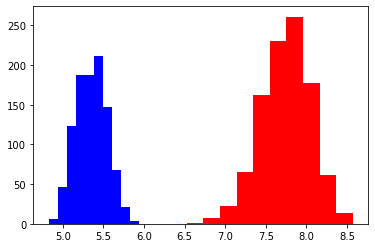

In [7]:
plt.hist(meanlist,color='b')
plt.hist(meanlist2,color='r')

In [8]:
def GetInterval(List, CL = 0.95):
    
    List.sort()
    
    #For two-side band confidence level we have
    
    
    ii = int(len(List)/100 * ( 1. - CL )/2.)
    
    print('The Lower limit at 95% of confidence level:', List[ii])
    print('The Upper limit at 95% of confidence level:', List[-ii])
    print('Central Values is:', np.percentile(List,50))

In [9]:
GetInterval(meanlist)
GetInterval(meanlist2)

The Lower limit at 95% of confidence level: 4.823529411764706
The Upper limit at 95% of confidence level: 4.823529411764706
Central Values is: 5.352941176470588
The Lower limit at 95% of confidence level: 6.527272727272728
The Upper limit at 95% of confidence level: 6.527272727272728
Central Values is: 7.763636363636365


# Ahora vamos a hacerlo para las diferencias

In [13]:
NSamples = 10000

diff = np.zeros(NSamples)

# Longitud de cada array
n1 = len(data)
n2 = len(data1)

# Sumamos ambos set de datos
Total = np.array( data + data1 )

In [14]:
for i in range(NSamples):
    
    np.random.shuffle(Total)
    
    TestA = Total[:n1]
    TestB = Total[n2:]
    
    diff[i] = np.mean(TestA) - np.mean(TestB)

(array([  15.,  119.,  621., 1584., 2564., 2564., 1707.,  667.,  136.,
          23.]),
 array([-1.47647059, -1.18294118, -0.88941176, -0.59588235, -0.30235294,
        -0.00882353,  0.28470588,  0.57823529,  0.87176471,  1.16529412,
         1.45882353]),
 <a list of 10 Patch objects>)

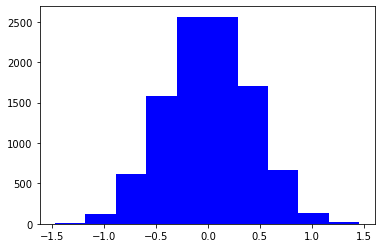

In [15]:
plt.hist(diff,color='b')

In [16]:
GetInterval(diff)

The Lower limit at 95% of confidence level: -1.4294117647058817
The Upper limit at 95% of confidence level: 1.4470588235294128
Central Values is: 4.440892098500626e-16
